In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


## 1. Análise dos dados

In [89]:
df_train = pd.read_csv('data/training.csv')
df_test = pd.read_csv('data/test.csv')

df_train


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [90]:
df_train_na = df_train.isna()



df_train_na.sum().sort_values(ascending=True)



nose_tip_x                      0
Image                           0
nose_tip_y                      0
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
mouth_center_bottom_lip_x      33
mouth_center_bottom_lip_y      33
mouth_center_top_lip_y       4774
mouth_center_top_lip_x       4774
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
right_eyebrow_inner_end_x    4779
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
right_eyebrow_inner_end_y    4779
mouth_right_corner_y         4779
mouth_right_corner_x         4779
mouth_left_corner_x          4780
mouth_left_corner_y          4780
right_eye_inner_corner_x     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
right_eye_inner_corner_y     4781
left_eye_outer_corner_y      4782
left_eye_outer_corner_x      4782
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eyebrow_o

In [91]:
# substituindo os valores nulos por 0
#irei tirar somente os valores nulos das colunas ['left_eye_center_x' , 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y']
cols = [
    'left_eye_center_x', 'left_eye_center_y',
    'right_eye_center_x', 'right_eye_center_y',
    'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y',
    'nose_tip_x', 'nose_tip_y'
]
df_train.dropna(subset=cols, inplace=True)


In [92]:
df_train.shape

(7000, 31)

In [93]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7000 non-null   float64
 1   left_eye_center_y          7000 non-null   float64
 2   right_eye_center_x         7000 non-null   float64
 3   right_eye_center_y         7000 non-null   float64
 4   left_eye_inner_corner_x    2237 non-null   float64
 5   left_eye_inner_corner_y    2237 non-null   float64
 6   left_eye_outer_corner_x    2235 non-null   float64
 7   left_eye_outer_corner_y    2235 non-null   float64
 8   right_eye_inner_corner_x   2239 non-null   float64
 9   right_eye_inner_corner_y   2239 non-null   float64
 10  right_eye_outer_corner_x   2240 non-null   float64
 11  right_eye_outer_corner_y   2240 non-null   float64
 12  left_eyebrow_inner_end_x   2236 non-null   float64
 13  left_eyebrow_inner_end_y   2236 non-null   float64
 1

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7000.000000,7000.000000,7000.000000,7000.000000,2237.000000,2237.000000,2235.000000,2235.000000,2239.000000,2239.000000,...,7000.000000,7000.000000,2238.000000,2238.000000,2239.000000,2239.000000,2245.000000,2245.000000,7000.000000,7000.000000
mean,66.349400,37.618104,30.303407,37.942656,59.141637,37.878998,73.309197,37.648917,36.615262,37.933717,...,48.372452,62.682027,63.292345,75.915123,32.884489,76.143394,47.973258,72.872976,48.571676,78.975710
std,3.377149,3.036592,2.948946,2.884111,2.516803,2.091264,3.232649,2.754860,2.088163,2.078302,...,4.171588,5.621675,4.022845,4.498775,3.826210,4.335843,3.164881,5.180245,4.237941,5.407683
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082412,35.897951,28.788607,36.326021,58.041351,36.614552,71.720359,36.065273,35.513632,36.758128,...,46.610759,59.304250,61.270976,72.874502,30.820537,73.261033,46.500307,69.369725,46.582199,75.555473
50%,66.490445,37.521582,30.252292,37.807311,59.294249,37.847075,73.222095,37.603724,36.651189,37.932044,...,48.424901,63.452070,63.184740,75.744827,32.984759,75.973161,47.906954,72.600750,48.595419,78.698200
75%,68.019111,39.240560,31.766950,39.555408,60.506341,39.226880,74.999539,39.335561,37.732750,39.149982,...,50.326257,66.485677,65.352249,78.826171,35.075534,78.919745,49.290947,76.166798,50.676650,82.234908
max,94.689280,80.502649,85.039381,81.270911,69.023030,56.291237,87.032252,56.384378,47.293746,56.743904,...,89.438592,88.825658,84.767123,94.673637,50.973348,93.443176,63.343322,93.916338,89.438592,95.808983


Então temos 30 keypoints e 1 uma imagem cada linha

In [94]:
df_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


## 2. Pre-Processamento dos dados

### 2.1 Gerando dados faltantes

In [95]:
# Agora vamos gerar os pontos que estao faltando
cols = [
    'left_eye_center_x', 'left_eye_center_y',
    'right_eye_center_x', 'right_eye_center_y',
    'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y',
    'nose_tip_x', 'nose_tip_y'
]


X_pp_all = df_train[cols]
y_pp_all= df_train.drop(columns=cols+['Image'])
X_pp_all.shape, y_pp_all.shape

((7000, 8), (7000, 22))

In [96]:
# Agora vamos pegar todos os dados que não estão nulos
X_pp = df_train[~df_train.isna().any(axis=1)][cols]

# e tambem o y de cada um desses X
y_pp = df_train[~df_train.isna().any(axis=1)].drop(columns=cols+['Image'])
X_pp.shape, y_pp.shape

((2140, 8), (2140, 22))

In [99]:
model_pp = models.Sequential()
model_pp.add(layers.Dense(512, activation='relu', input_shape=(X_pp.shape[1],)))
model_pp.add(layers.Dense(512, activation='relu'))
model_pp.add(layers.Dense(22))

model_pp.summary()

/home/yienvee/anaconda3/envs/tf-gpu/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 22)             │        11,286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,550 (1.06 MB)

 Trainable params: 278,550 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model_pp.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError(), 'accuracy'])

history = model_pp.fit(X_pp, y_pp, epochs=500, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.1604 - loss: 1226.2124 - root_mean_squared_error: 34.0904 - val_accuracy: 0.1332 - val_loss: 107.8720 - val_root_mean_squared_error: 10.3861
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1490 - loss: 76.7879 - root_mean_squared_error: 8.7201 - val_accuracy: 0.5234 - val_loss: 39.9872 - val_root_mean_squared_error: 6.3235
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6296 - loss: 24.4477 - root_mean_squared_error: 4.9266 - val_accuracy: 0.5304 - val_loss: 22.0809 - val_root_mean_squared_error: 4.6990
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8053 - loss: 11.2255 - root_mean_squared_error: 3.3472 - val_accuracy: 0.5234 - val_loss: 18.2340 - val_root_mean_squared_error: 4.2701
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8115 - loss: 7.8061 - root_mean_squared_error: 2.7939 - val_accuracy: 0.5234 - val_loss: 15.1429 - val_root_mean_squared_err

In [109]:
X_not_in_pp = X_pp_all[~X_pp_all.index.isin(X_pp.index)]
y_not_in_pp = y_pp_all[~y_pp_all.index.isin(y_pp.index)]
y_not_in_pp.isna().sum() # 0

left_eye_inner_corner_x      4763
left_eye_inner_corner_y      4763
left_eye_outer_corner_x      4765
left_eye_outer_corner_y      4765
right_eye_inner_corner_x     4761
right_eye_inner_corner_y     4761
right_eye_outer_corner_x     4760
right_eye_outer_corner_y     4760
left_eyebrow_inner_end_x     4764
left_eyebrow_inner_end_y     4764
left_eyebrow_outer_end_x     4806
left_eyebrow_outer_end_y     4806
right_eyebrow_inner_end_x    4767
right_eyebrow_inner_end_y    4767
right_eyebrow_outer_end_x    4799
right_eyebrow_outer_end_y    4799
mouth_left_corner_x          4762
mouth_left_corner_y          4762
mouth_right_corner_x         4761
mouth_right_corner_y         4761
mouth_center_top_lip_x       4755
mouth_center_top_lip_y       4755
dtype: int64

In [ ]:
y_pred = model_pp.predict(X_not_in_pp)
y_pred.shape
# Add the predicted values to the original dataframe
df_train.loc[X_not_in_pp.index, y_not_in_pp.columns] = y_pred

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [116]:
df_train.isna().sum(), df_train.shape

(left_eye_center_x            0
 left_eye_center_y            0
 right_eye_center_x           0
 right_eye_center_y           0
 left_eye_inner_corner_x      0
 left_eye_inner_corner_y      0
 left_eye_outer_corner_x      0
 left_eye_outer_corner_y      0
 right_eye_inner_corner_x     0
 right_eye_inner_corner_y     0
 right_eye_outer_corner_x     0
 right_eye_outer_corner_y     0
 left_eyebrow_inner_end_x     0
 left_eyebrow_inner_end_y     0
 left_eyebrow_outer_end_x     0
 left_eyebrow_outer_end_y     0
 right_eyebrow_inner_end_x    0
 right_eyebrow_inner_end_y    0
 right_eyebrow_outer_end_x    0
 right_eyebrow_outer_end_y    0
 nose_tip_x                   0
 nose_tip_y                   0
 mouth_left_corner_x          0
 mouth_left_corner_y          0
 mouth_right_corner_x         0
 mouth_right_corner_y         0
 mouth_center_top_lip_x       0
 mouth_center_top_lip_y       0
 mouth_center_bottom_lip_x    0
 mouth_center_bottom_lip_y    0
 Image                        0
 dtype: 

### 2.2 Formatando a imagem



In [117]:
# Como as imagens estão em formato de string, precisamos convertê-las para um array numpy
# Na descrição do dataset, é dito que as imagens são 96x96 pixels, então vamos usar isso para redimensionar as imagens

df_train['Image'] = df_train['Image'].apply(lambda x: np.fromstring(x, sep=' ').reshape(96, 96))
df_test['Image'] = df_test['Image'].apply(lambda x: np.fromstring(x, sep=' ').reshape(96, 96))


In [118]:
df_train['Image'].head()

0    [[238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 23...
1    [[219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 21...
2    [[144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 18...
3    [[193.0, 192.0, 193.0, 194.0, 194.0, 194.0, 19...
4    [[147.0, 148.0, 160.0, 196.0, 215.0, 214.0, 21...
Name: Image, dtype: object

(96, 96)


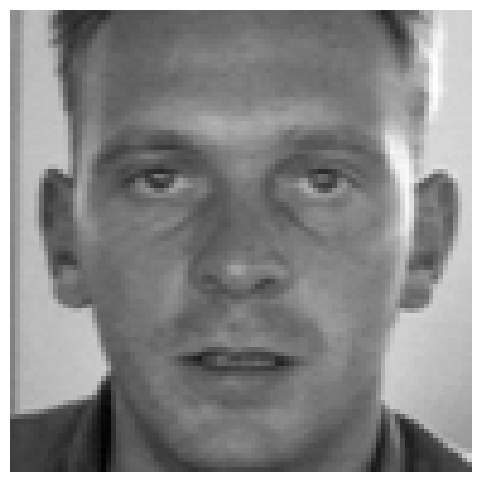

In [119]:
plt.figure(figsize=(10, 6))
# mostrar a imagem do dataframe vendo os valores como uma imagem
print(df_train['Image'][2].shape)
plt.imshow(df_train['Image'][2], cmap='grey')
plt.axis('off')
plt.show()


## 3. Separando os dados

In [120]:
X_train = np.array(df_train['Image'].tolist())
y_train = df_train.drop(columns=['Image']).values

X_test = np.array(df_test['Image'].tolist())
y_test = df_test.drop(columns=['Image']).values

## 4. Modelo

In [121]:
model = models.Sequential()
model.add(layers.Conv2D(16, (10, 10), activation='sigmoid', input_shape=(96, 96, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(30))

model.summary()

/home/yienvee/anaconda3/envs/tf-gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 87, 87, 16)     │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 43, 43, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 42, 8)      │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14112)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       903,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907,318 (3.46 MB)

 Trainable params: 907,318 (3.46 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError(), 'accuracy'])

history = model.fit(X_train, y_train, epochs=500, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 1.6600e-04 - loss: 2558.8977 - root_mean_squared_error: 50.5849 - val_accuracy: 7.1429e-04 - val_loss: 2504.7959 - val_root_mean_squared_error: 50.0479
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.3854e-04 - loss: 2416.0210 - root_mean_squared_error: 49.1526 - val_accuracy: 7.1429e-04 - val_loss: 2369.1753 - val_root_mean_squared_error: 48.6742
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.6600e-04 - loss: 2282.7803 - root_mean_squared_error: 47.7781 - val_accuracy: 7.1429e-04 - val_loss: 2240.2117 - val_root_mean_squared_error: 47.3309
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 5.8545e-05 - loss: 2158.3850 - root_mean_squared_error: 46.4580 - val_accuracy: 7.1429e-04 - val_loss: 2117.5442 - val_root_mean_squared_error: 46.0168
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.6108e-05 - loss: 2034.3688 - root_mean_squared_error: 45.1038 - val_a

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


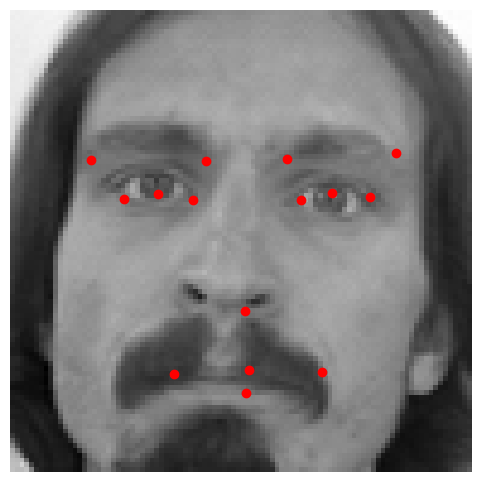

In [123]:
foto_testada = 0

pred = model.predict(X_train[foto_testada].reshape(1 , 96, 96, 1))

# plotar a imagem original e os keypoints previstos
plt.figure(figsize=(10, 6))
plt.imshow(X_train[foto_testada], cmap='gray')
plt.scatter(pred[0].tolist()[0:30:2], pred[0].tolist()[1:30:2], c='red')
#plt.scatter(y_train[foto_testada][0:30:2], y_train[foto_testada][1:30:2], c='blue')
plt.axis('off')
plt.show()

